In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils import to_categorical

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

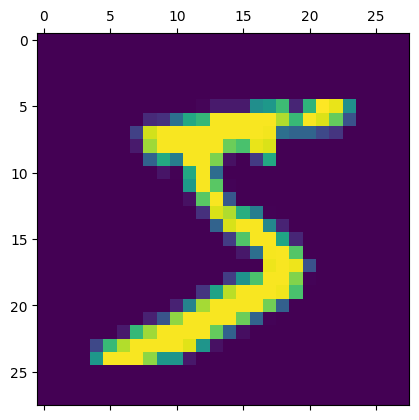

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
#scaling
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0
#convert output into one hot encoded form For categorical cross-entropy loss
y_train_1hot = to_categorical(y_train, 10)
y_test_1hot = to_categorical(y_test, 10)


In [9]:
X_train.shape

(60000, 784)

In [10]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
y_train_1hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [12]:
#2 hidden layers
model = keras.Sequential([
    keras.Input(shape=(784,)),  # Define the input shape
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
]) 
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)       
model.fit(X_train, y_train_1hot, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8790 - loss: 0.4188
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9685 - loss: 0.1063
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9781 - loss: 0.0698
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9842 - loss: 0.0511
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9880 - loss: 0.0372
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9894 - loss: 0.0309
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9914 - loss: 0.0255
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9917 - loss: 0.0232
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9927 - loss: 0.0218
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9947 - loss: 0.0163


In [13]:
#1 hidden layers
#better
model = keras.Sequential([
    keras.Input(shape=(784,)),  # Define the input shape
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)       
model.fit(X_train, y_train_1hot, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8765 - loss: 0.4352
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9661 - loss: 0.1201
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9771 - loss: 0.0771
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9846 - loss: 0.0522
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9872 - loss: 0.0415
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9909 - loss: 0.0317
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9918 - loss: 0.0250
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9946 - loss: 0.0182
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9956 - loss: 0.0145
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9966 - loss: 0.0120


In [14]:
model.evaluate(X_test,y_test_1hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9723 - loss: 0.1051


[0.08618015050888062, 0.9763000011444092]

In [86]:
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

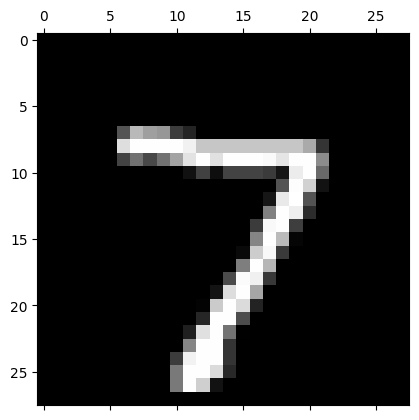

In [87]:
first_test_image = X_test[0].reshape(28, 28)

# Display the image
plt.matshow(first_test_image, cmap='gray')
plt.show()

In [17]:
y_predicted=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [90]:
y_predicted[0]

array([1.1921726e-03, 2.2865277e-05, 6.5819211e-02, 9.2326230e-01,
       2.4762397e-07, 3.0438143e-03, 4.6843883e-11, 9.9999952e-01,
       1.4290811e-02, 1.1165082e-01], dtype=float32)

In [19]:
np.argmax(y_predicted[0]) #predicted answer

7

In [20]:
y_predicted_values=[np.argmax(i) for i in y_predicted ]

In [21]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_values)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    1,    0,    0,    0,    0,    2,    1,    2,    0],
       [   0, 1126,    3,    0,    0,    0,    0,    1,    5,    0],
       [   9,    2,  997,    0,    6,    0,    3,    9,    6,    0],
       [   1,    0,    5,  981,    1,    6,    0,    6,    7,    3],
       [   2,    1,    2,    0,  968,    0,    2,    0,    2,    5],
       [   3,    1,    0,   10,    1,  862,    4,    2,    6,    3],
       [   8,    2,    2,    1,    5,    2,  935,    0,    3,    0],
       [   1,    4,    8,    0,    2,    0,    0, 1009,    2,    2],
       [  12,    0,    3,    1,    5,    3,    0,    5,  944,    1],
       [   3,    3,    0,    2,   16,    1,    0,   13,    4,  967]])>

Text(95.72222222222221, 0.5, 'Truth')

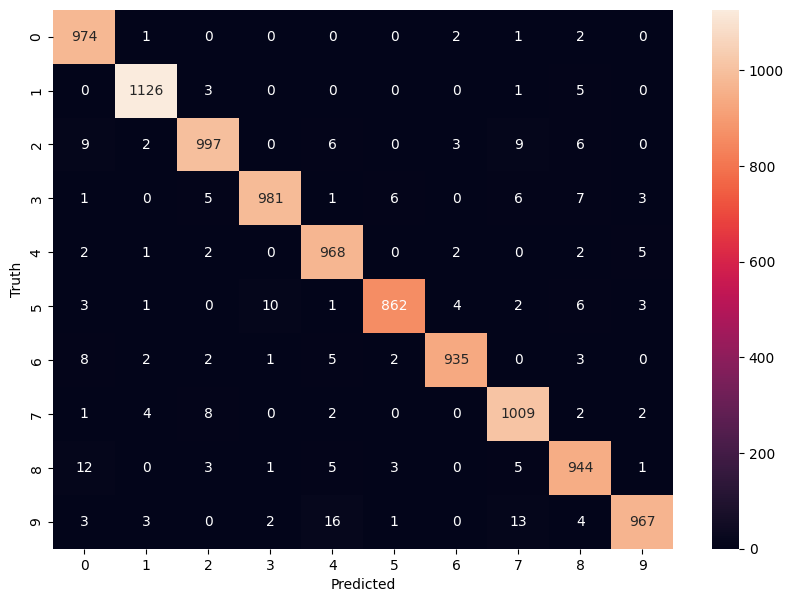

In [24]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')